# Exploration Workbook for Texas Land Temps

In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

import warnings
warnings.filterwarnings("ignore")

## Acquire

In [2]:
#read in the csv locally
df = pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head(1)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil


In [3]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


## Prepare

In [4]:
#Filter for State of Texas
df = df[df.State == 'Texas']

In [5]:
#Check the shape of the df
df.shape

(2325, 5)

In [6]:
#Validate all of the observations are Tx and only Tx
df.State.nunique()

1

In [7]:
#Check the info and see if there are any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 549727 to 552051
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2325 non-null   object 
 1   AverageTemperature             2325 non-null   float64
 2   AverageTemperatureUncertainty  2325 non-null   float64
 3   State                          2325 non-null   object 
 4   Country                        2325 non-null   object 
dtypes: float64(2), object(3)
memory usage: 109.0+ KB


In [8]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
549727,1820-01-01,4.489,3.369,Texas,United States
549728,1820-02-01,9.081,2.873,Texas,United States
549729,1820-03-01,12.657,2.423,Texas,United States
549730,1820-04-01,19.215,2.501,Texas,United States
549731,1820-05-01,22.577,2.495,Texas,United States


In [9]:
#Set dt to be datetime format
df['dt'] = pd.to_datetime(df.dt, format='%Y-%m-%d')

In [10]:
#set date time back to index
df = df.set_index('dt').sort_index()

In [11]:
#Drop State and Country since I know I am working with all Texas Data
df.drop(columns={'State', 'Country'}, inplace=True)

In [12]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1820-01-01,4.489,3.369
1820-02-01,9.081,2.873
1820-03-01,12.657,2.423
1820-04-01,19.215,2.501
1820-05-01,22.577,2.495


In [13]:
#Check the stats 
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,2325.000000,2325.000000
mean,18.107234,0.794785
std,7.413791,0.893291
min,1.965000,0.044000
25%,11.206000,0.180000
50%,18.378000,0.310000
75%,25.398000,1.241000
max,31.401000,4.950000


<AxesSubplot:>

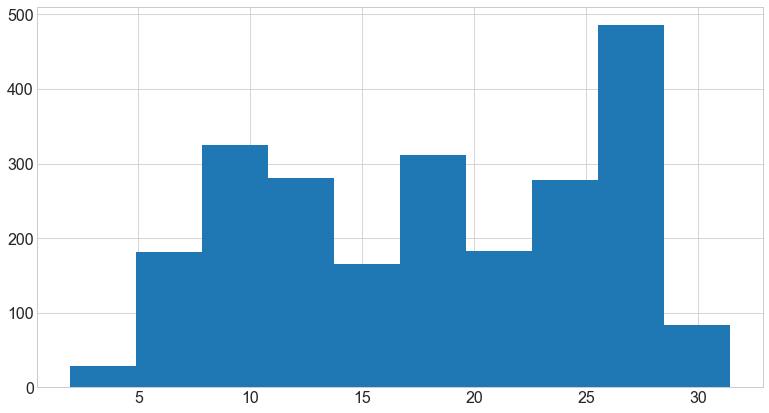

In [14]:
#Visualize the avg temp dist
df.AverageTemperature.hist()

<AxesSubplot:>

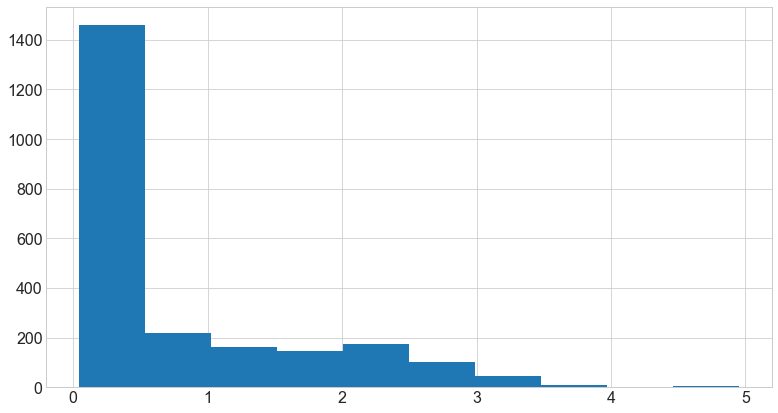

In [15]:
#Visualize the uncertainty dist
df.AverageTemperatureUncertainty.hist()

### Split the data

In [16]:
#Define the train size
train_size = int(len(df) * .5)
train_size

1162

In [17]:
#Define Validate size
validate_size = int(len(df) * .3)
validate_size

697

In [18]:
#Define Test size
test_size = int(len(df) - train_size - validate_size)
test_size

466

In [19]:
#Define the end to the validate df
validate_end_index = train_size + validate_size
validate_end_index

1859

In [20]:
#Split the data into three dataframes
train = df[: train_size]
validate = df[train_size:validate_end_index]
test = df[validate_end_index:]

In [21]:
#Check that the split is accurate
print(len(train) + len(validate) + len(test) == len(df))

True


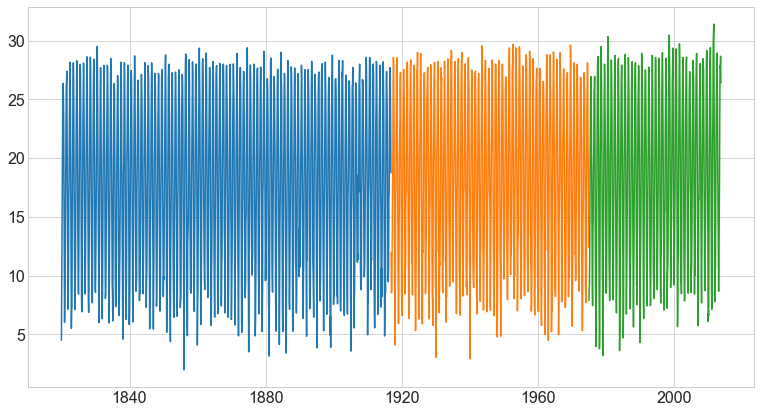

In [22]:
#Visulaize the three splits to ensure that each split captures a complete season, cycle, trend
plt.plot(train.index, train.AverageTemperature)
plt.plot(validate.index, validate.AverageTemperature)
plt.plot(test.index, test.AverageTemperature)

## Exploration

In [23]:
#Create a column for month
train['month'] = train.index.month_name()

In [24]:
#Set the target to y
y = train.AverageTemperature
y.head()

dt
1820-01-01     4.489
1820-02-01     9.081
1820-03-01    12.657
1820-04-01    19.215
1820-05-01    22.577
Name: AverageTemperature, dtype: float64

**What is the distribution of Texas Land Temps by month? By year?**

[Text(0.5, 1.0, 'Average Land Temperatures (C) by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Freq of Temp Observation')]

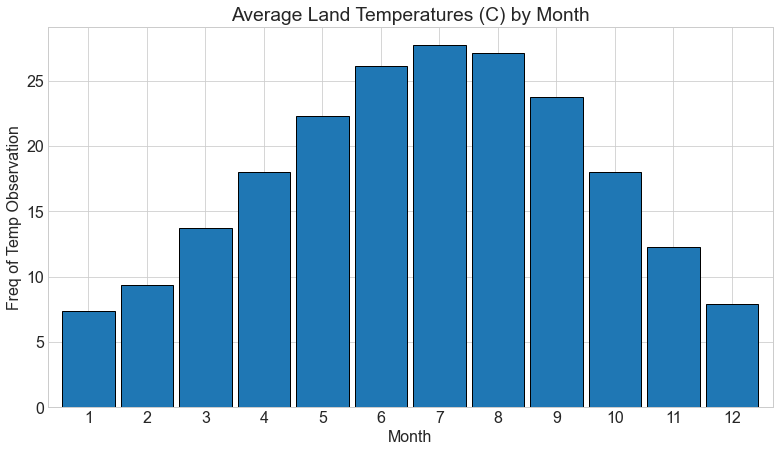

In [25]:
#Plot the dist of avg_temps by month

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')

plt.xticks(rotation=0)

ax.set(title='Average Land Temperatures (C) by Month', xlabel='Month', ylabel='Freq of Temp Observation')

[Text(0.5, 1.0, 'Average Land Temperatures (C) by Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Freq of Temp Observation')]

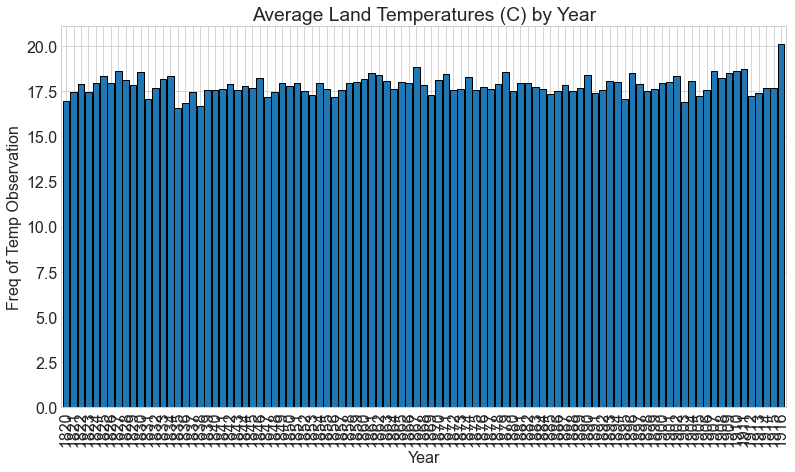

In [28]:
#Plot the dist of avg_temps by month

ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')

plt.xticks(rotation=90)

ax.set(title='Average Land Temperatures (C) by Year', xlabel='Year', ylabel='Freq of Temp Observation')

**Takeaways:**<br>
Month land temp is Normally distributed<br>
Not a ton of variance in land temp by year<br>
A lot of noise need reduction

**Explore Texas Land Temps with Noise Reduction**

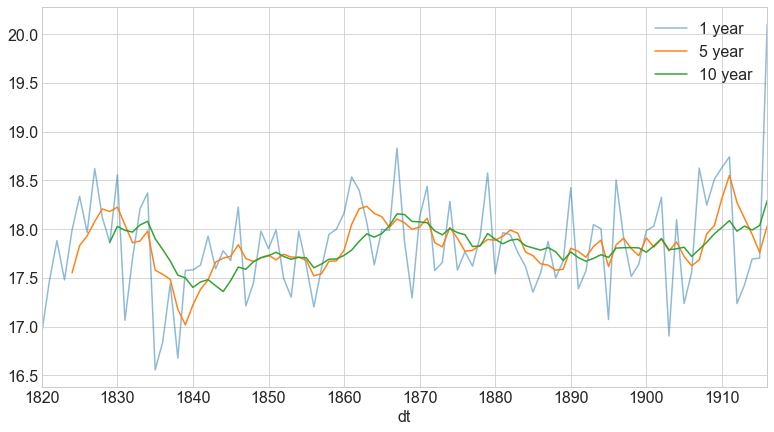

In [29]:
#Visualize with rolling averages to reduce noise
y.resample('Y').mean().rolling(1).mean().plot(alpha=.5, label='1 year')
y.resample('Y').mean().rolling(5).mean().plot(alpha=8, label='5 year')
y.resample('Y').mean().rolling(10).mean().plot(alpha=8, label='10 year')
plt.legend()